# Components

In [1]:
import pandas as pd
import numpy as np
import csv
import json
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
reader = csv.reader(open("components/undefined-components.csv"))
next(reader, None)
undefined_components = {}
for row in reader: undefined_components[row[0]] = row[1] 

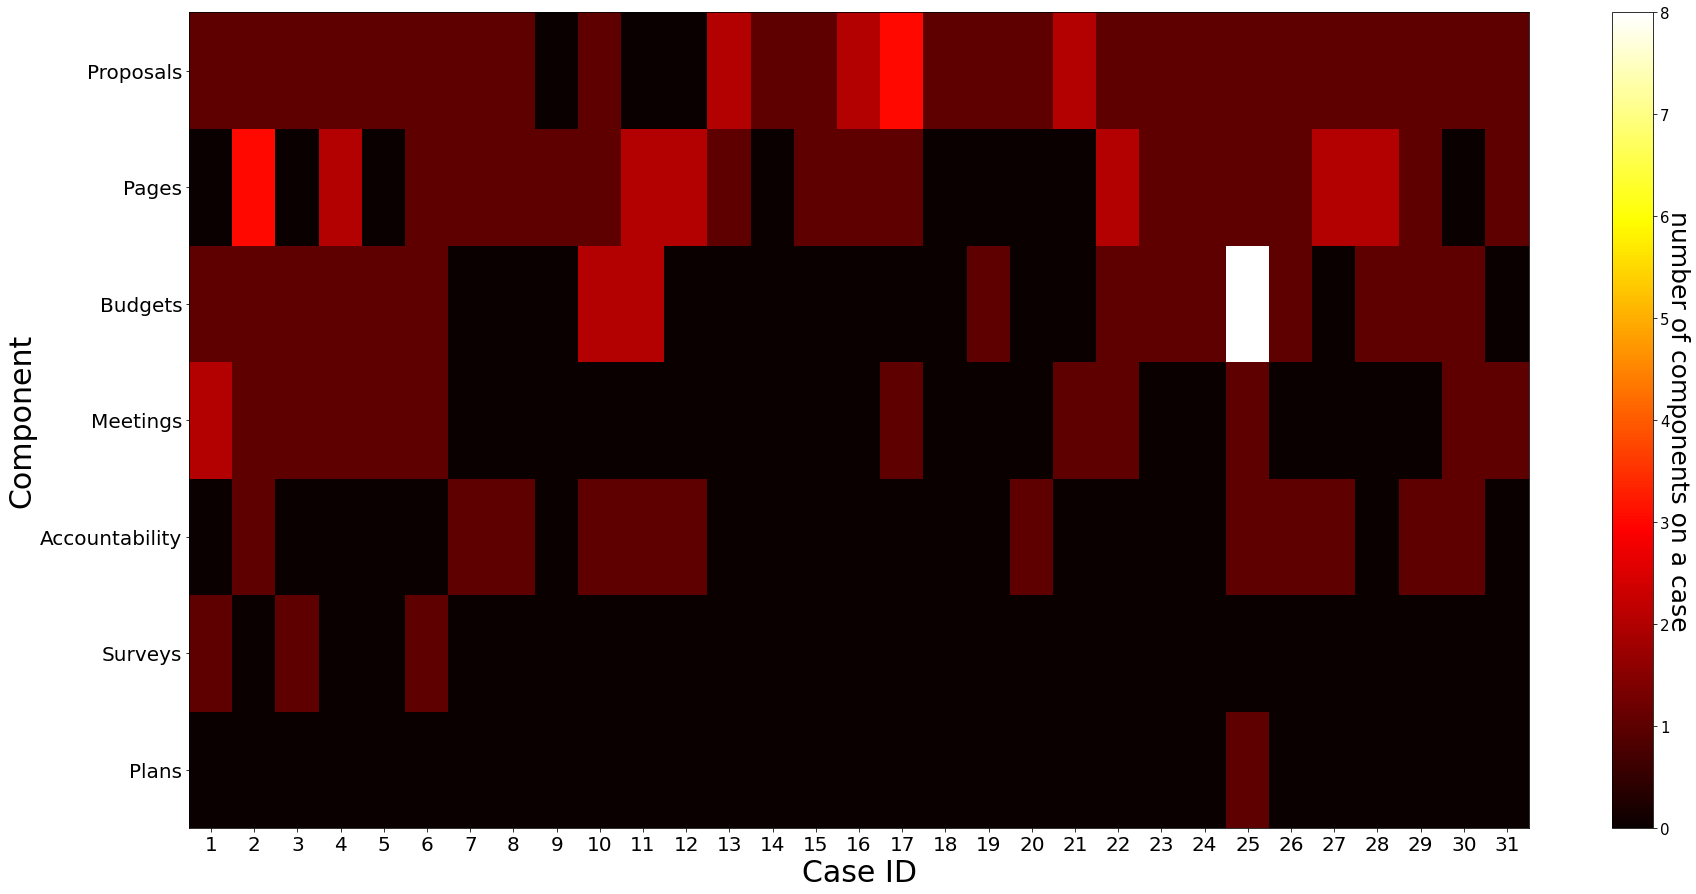

In [3]:
df = pd.read_csv('decidimpb.csv',sep='\t')
processes = df[['PB process url','PB process id']].values

decidim_components = ['Plans','Surveys','Accountability','Meetings','Budgets','Pages','Proposals']
instances_components = {}

for process in processes:
    id = str(int(process[1]))
    host = process[0].split('/processes/')[0]
    process_name = process[0].split('/processes/')[1]
    parsed_uri = urlparse(host)
    try:
        with open('processes/'+ '{uri.netloc}'.format(uri=parsed_uri).replace('.','_')+'__'+process_name+'.json') as json_file:
            data = json.load(json_file)
            process_components = (data['data']['participatoryProcess']['components'])
            for component in decidim_components: 
                instances_components[(process[0],component)] = 0
            for component in process_components: 
                typename = component['__typename']
                if 'Component'== typename:
                    typename = undefined_components[process[0]+'/f/'+component['id']]

                if typename != '':
                    instances_components[(process[0],typename)] = instances_components[(process[0],typename)]+1
    except:
        print('error','processes/'+ '{uri.netloc}'.format(uri=parsed_uri).replace('.','_')+'__'+process_name+'.json')
        


with open('components/components.csv', mode='w') as component_file:
    component_writer = csv.writer(component_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    component_writer.writerow(['process']+decidim_components)        
    for process in processes:        
            try:
                component_writer.writerow(
                    [process[0]] + [instances_components[(process[0],component)] for component in decidim_components])
            except:
                pass
            
        
df = pd.read_csv('components/components.csv', index_col=[0])
df.index = df.index.str.replace('https://','')
df.index = df.index.str.replace('/processes/','  ')
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
heatmap = ax.pcolor(df.values.transpose(), cmap=plt.cm.hot)
fig.set_size_inches(30, 15)
ax.set_yticks(np.arange(len(decidim_components)) + 0.5, minor=False)
ax.set_xticks(np.arange(len(df.index.values.tolist())) + 0.5, minor=False)
ax.set_xticklabels(range(1,len(df.index)+1))
ax.set_yticklabels(decidim_components)
#plt.xticks(rotation=90)
cbar = plt.colorbar(heatmap)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
cbar.set_label('number of components on a case', rotation=270, labelpad=20, fontsize=25)    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)

ax.set_xlabel('Case ID')
ax.xaxis.label.set_size(30)
ax.set_ylabel('Component')
ax.yaxis.label.set_size(30)
plt.show()
fig.savefig('img/heatmap.pdf', format='pdf')                    

In [4]:
print (len(df[(df.Proposals==0)&(df.Budgets>0)]))
print (len(df[(df.Proposals>0)&(df.Budgets==0)]))
print (len(df[(df.Proposals>0)&(df.Budgets>0)]))
print (len(df[(df.Meetings>0)]))
print (len(df[(df.Accountability>0)]))

1
12
16
12
12


In [5]:
df

,Plans,Surveys,Accountability,Meetings,Budgets,Pages,Proposals
process,,,,,,,
decidim-calaf.diba.cat pressupostosparticipatiuscalaf2020,0,1,0,2,1,0,1
decidim.calafell.cat pressupostos-participatius-2020,0,0,1,1,1,3,1
participa.gavaciutat.cat Participaccio,0,1,0,1,1,0,1
www.decidimmataro.cat trtyrt,0,0,0,1,1,2,1
decidim-montmelo.diba.cat pressupostosparticipatius,0,0,0,1,1,0,1
palamos-decidim.ddgi.cat pressupost2019,0,1,0,1,1,1,1
decidim.sabadell.cat pressupostsbd,0,0,1,0,0,1,1
decidim.sabadell.cat construintsbd,0,0,1,0,0,1,1
decidim.sabadell.cat construintsbd17,0,0,0,0,0,1,0


<AxesSubplot:>

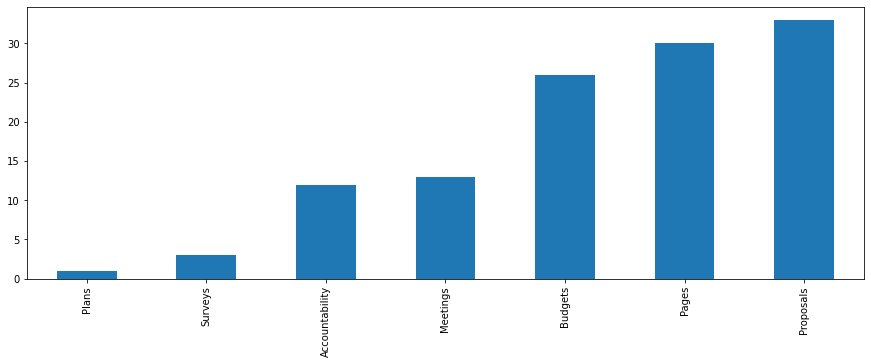

In [6]:
df.sum(axis=0).plot(kind="bar", figsize=(15,5))

<AxesSubplot:xlabel='process'>

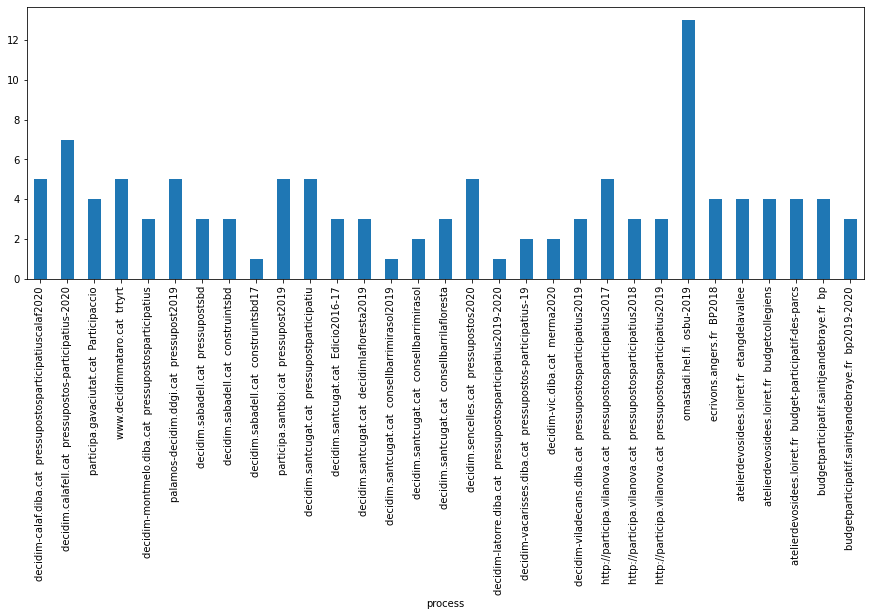

In [7]:
df.sum(axis=1).plot(kind="bar", figsize=(15,5))

In [8]:
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Plans,Surveys,Accountability,Meetings,Budgets,Pages,Proposals
Plans,1.000000,-0.059761,0.229734,0.191014,0.908586,0.007529,-0.020874
Surveys,-0.059761,1.000000,-0.260133,0.539055,0.036688,-0.265475,-0.037424
Accountability,0.229734,-0.260133,1.000000,-0.242509,0.273164,0.286770,-0.325589
Meetings,0.191014,0.539055,-0.242509,1.000000,0.246257,-0.117452,0.222622
Budgets,0.908586,0.036688,0.273164,0.246257,1.000000,0.081352,-0.146089
Pages,0.007529,-0.265475,0.286770,-0.117452,0.081352,1.000000,-0.214532
Proposals,-0.020874,-0.037424,-0.325589,0.222622,-0.146089,-0.214532,1.000000


# Clustering

In [9]:
std = StandardScaler().fit_transform(df) # normalizing the data 
pca = PCA(n_components=len(decidim_components))
principalComponents = pca.fit_transform(std)

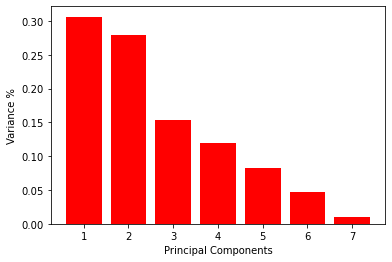

In [10]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

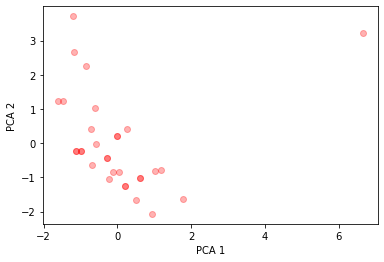

In [11]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='red')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

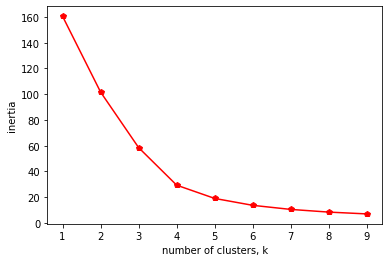

In [12]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='red')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

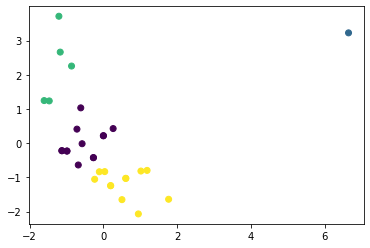

In [13]:
n_clusters=4
model = KMeans(n_clusters)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [14]:
process_names = df.index.values.tolist()
for c in range(n_clusters):
    print('\nCluster',c)
    indices = list(np.where(labels == c)[0])
    for i in indices:
        print(process_names[i])


Cluster 0
www.decidimmataro.cat  trtyrt
decidim-montmelo.diba.cat  pressupostosparticipatius
decidim.santcugat.cat  decidimlafloresta2019
decidim.santcugat.cat  consellbarrimirasol2019
decidim.santcugat.cat  consellbarrimirasol
decidim.santcugat.cat  consellbarrilafloresta
decidim-latorre.diba.cat  pressupostosparticipatius2019-2020
decidim-vacarisses.diba.cat  pressupostos-participatius-19
http://participa.vilanova.cat  pressupostosparticipatius2017
http://participa.vilanova.cat  pressupostosparticipatius2018
http://participa.vilanova.cat  pressupostosparticipatius2019
budgetparticipatif.saintjeandebraye.fr  bp
budgetparticipatif.saintjeandebraye.fr  bp2019-2020

Cluster 1
omastadi.hel.fi  osbu-2019

Cluster 2
decidim-calaf.diba.cat  pressupostosparticipatiuscalaf2020
participa.gavaciutat.cat  Participaccio
palamos-decidim.ddgi.cat  pressupost2019
decidim.sencelles.cat  pressupostos2020
decidim-viladecans.diba.cat  pressupostosparticipatius2019

Cluster 3
decidim.calafell.cat  pressu

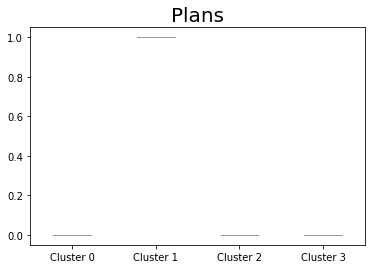

Cluster 0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cluster 1 [1]
Cluster 2 [0, 0, 0, 0, 0]
Cluster 3 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]





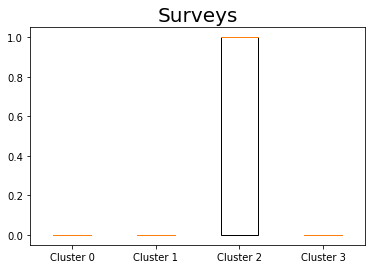

Cluster 0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Cluster 1 [0]
Cluster 2 [1, 1, 1, 0, 0]
Cluster 3 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]





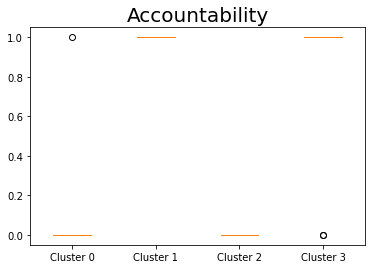

Cluster 0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Cluster 1 [1]
Cluster 2 [0, 0, 0, 0, 0]
Cluster 3 [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1]





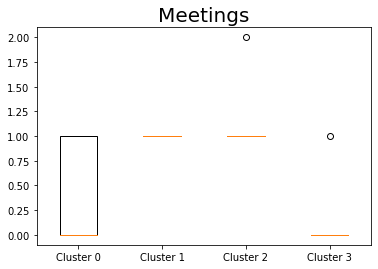

Cluster 0 [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
Cluster 1 [1]
Cluster 2 [2, 1, 1, 1, 1]
Cluster 3 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]





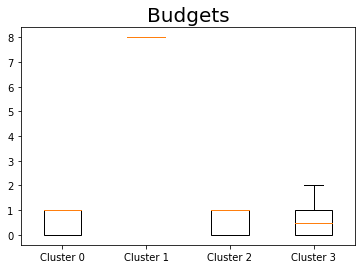

Cluster 0 [1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
Cluster 1 [8]
Cluster 2 [1, 1, 1, 0, 0]
Cluster 3 [1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 1]





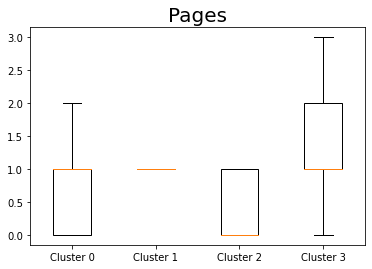

Cluster 0 [2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1]
Cluster 1 [1]
Cluster 2 [0, 0, 1, 1, 0]
Cluster 3 [3, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1]





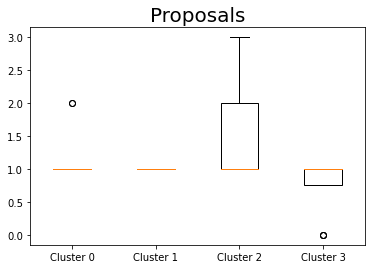

Cluster 0 [1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
Cluster 1 [1]
Cluster 2 [1, 1, 1, 3, 2]
Cluster 3 [1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]





In [15]:
for component in decidim_components:
    data = []
    process_components = df[component].values.tolist()
    for c in range(n_clusters):
        values = [process_components[i] for i in list(np.where(labels == c)[0])]
        data.append(values)
    fig, ax = plt.subplots()
    ax.set_title(component, fontsize=20)
    box = ax.boxplot(data, patch_artist=True)
    plt.setp(box["boxes"], facecolor='white')
    ax.set_xticklabels(['Cluster '+str(i) for i in range(n_clusters)])
    plt.show()
    for i, d in enumerate(data):
        print ('Cluster',i,d)
    print ('\n\n')